In [30]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [31]:
lin_reg = LinearRegression(
    # fit_intercept=False
    )

In [32]:
X = np.linspace(1, 10, 20)
y = 3*X + np.random.normal(size=(X.shape[0]))
X = X.reshape(-1, 1)

lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
lin_reg.predict(X)

array([ 3.47831066,  4.85395176,  6.22959286,  7.60523397,  8.98087507,
       10.35651618, 11.73215728, 13.10779838, 14.48343949, 15.85908059,
       17.2347217 , 18.6103628 , 19.98600391, 21.36164501, 22.73728611,
       24.11292722, 25.48856832, 26.86420943, 28.23985053, 29.61549163])

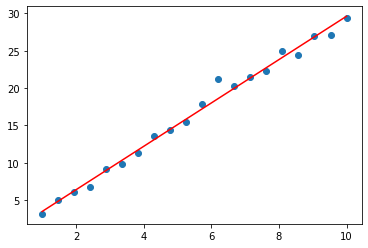

In [34]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, lin_reg.predict(X), 'r-')

In [35]:
lin_reg.coef_, lin_reg.intercept_

(array([2.90413122]), 0.5741794354483911)

## boston_data

In [36]:
from  sklearn.datasets import load_boston

In [37]:
boston = load_boston()

In [41]:
X = boston.data
y = boston.target

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_train.shape

(404, 13)

In [44]:
lin_reg = LinearRegression().fit(X_train, y_train)
lin_reg


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
y_pred = lin_reg.predict(X_train)
y_pred

array([10.96952405, 19.41196567, 23.06419602, 12.1470648 , 18.3738116 ,
       25.24677946, 20.77024774, 23.90932632,  7.81713319, 19.60988098,
       21.8202963 , 27.59615864, 32.67986504, 15.12308446, 35.3964561 ,
       12.99688651, 20.728181  , 28.30223542, 15.61724836, 24.45143096,
        4.61794591, 23.76681932, 25.56178249, 22.98928526, 24.5213025 ,
       34.06407919, 19.71166707, 39.11233072, 14.62515846, 24.81139885,
       18.02332883, 20.85836445,  9.57577261, 20.87246835, 22.28583096,
       31.79327155, 31.04748307, 15.70611763, 17.01382935, 28.23332703,
       24.27661276, 16.88670215,  6.90720745, 26.75808901, 22.586493  ,
       17.53664716, 13.77197016, 41.04840929, 16.44690754, 18.23531669,
       25.37038646, 23.64581399, 22.05322581, 20.83620499, 16.93508273,
       22.797579  , 29.13333934,  7.69310515, 24.60571452, 17.2358028 ,
       21.10846551, 25.15150324, 27.33394823, 21.30494963, 41.5811902 ,
       19.19666651, 15.37955448, 19.33545877, 17.04687638, 22.96

In [57]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_pred, y_train)
train_rmse = np.sqrt(train_mse)
train_rmse

4.652033184880168

In [48]:
y_train.std()

9.320590315691252

In [59]:
lin_reg.score(X_train,y_train)

0.7508856358979672

In [49]:
from sklearn.model_selection import cross_validate


In [60]:
cv = cross_validate(lin_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv

{'fit_time': array([0.00262809, 0.00091743, 0.00076246, 0.00096297, 0.00097084]),
 'score_time': array([0.00176764, 0.00035858, 0.00039744, 0.00058532, 0.00056243]),
 'test_score': array([-17.20183677, -34.40858715, -23.73328987, -20.28446607,
        -22.6439115 ])}

In [62]:
from sklearn import metrics
# metrics.SCORERS.keys()

In [63]:
cv = cross_validate(lin_reg, X_train, y_train, cv=5)
cv

{'fit_time': array([0.00158477, 0.00098109, 0.00086737, 0.0009172 , 0.000844  ]),
 'score_time': array([0.00095677, 0.00175524, 0.00075197, 0.00057745, 0.00051212]),
 'test_score': array([0.77501982, 0.62424945, 0.7594282 , 0.78766681, 0.67581438])}

In [64]:
cv['test_score'].mean()

0.7244357342240255

In [65]:
lin_reg.score(X_train, y_train)

0.7508856358979672

In [67]:
from sklearn.metrics import r2_score
r2_score(y_train, lin_reg.predict(X_train))

0.7508856358979672

In [69]:
X.shape

(506, 13)

In [74]:
lin_reg.coef_, lin_reg.intercept_

(array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
        -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
         2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
        -5.08571424e-01]), 30.246750993923925)

In [75]:
try:
    from mglearn.datasets import load_extended_boston
except:
    !pip install mglearn
    from mglearn.datasets import load_extended_boston

In [79]:
X_extended, y_extended = load_extended_boston()
X_extended.shape, y_extended.shape

((506, 104), (506,))

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_extended, y_extended, random_state=42, test_size=0.2)

In [91]:
X_train.shape

(404, 104)

In [83]:
lin_reg = LinearRegression().fit(X_train, y_train)
lin_reg.score(X_train, y_train)

0.94093170271135

In [85]:
lin_reg.score(X_test, y_test)

0.805582944797218

In [88]:
lin_reg.coef_.max(), lin_reg.coef_.min(), np.median(lin_reg.coef_)

(1360.8324939640343, -1662.0222539634485, -1.9021615490189987)

In [90]:
lin_reg.coef_.argmax()

15

## Ridge

In [92]:
from sklearn.linear_model import Ridge

In [102]:
ridge = Ridge(alpha=0.1).fit(X_train, y_train)
ridge.coef_.max(), ridge.coef_.min(), np.mean(ridge.coef_)

(24.958656409206277, -18.88769986064645, -0.11367149936353863)

In [103]:
ridge.score(X_train, y_train), ridge.score(X_test, y_test)

(0.9120292678182622, 0.8510741726311931)

## 연습
- Ridge를 사용해서, 알파값을 각각 (0.01, 0.1, 1, 10, 100)으로 해서  coef_의 값들을 bar plotting. 해볼게요. 
- text로 r2_score도 함께.

In [ ]:
# alpha값(람다값이) 커지면 커질수록 0에 가까워진다. (But, 0은 되지 않아요.)

ridge = None
alpha_list = [0.01, 0.1, 1, 10, 100]

best_score = -1
ridge_best_params = {'alpha': 0}
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    plt.figure(figsize=(10,10))
    plt.bar(range(ridge.coef_.shape[0]), ridge.coef_)
    plt.text(-3, 3, "alpha:{}".format(alpha))

    score = ridge.score(X_train, y_train)
    if best_score < score:
        best_score = score
        ridge_best_params['alpha'] = alpha
    plt.show()
    

In [113]:
ridge = Ridge(alpha=alpha).fit(X_train, y_train)


In [107]:
from sklearn.linear_model import Lasso

## Lasso 
- Linear Regression L1규제

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.338875309416835, tolerance: 3.509685514851485
  positive)


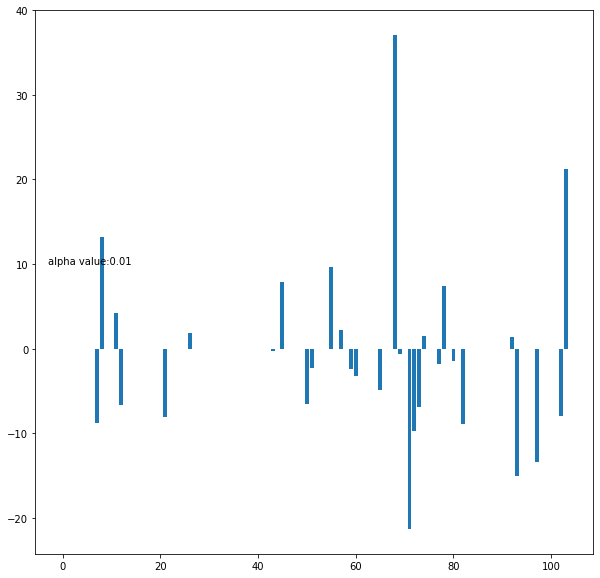

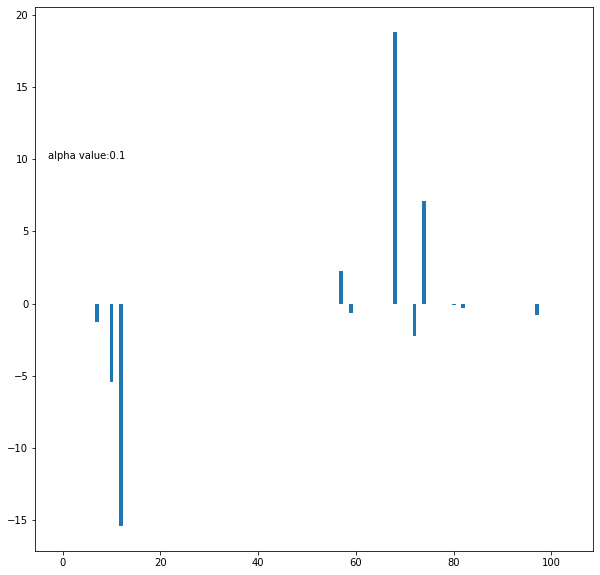

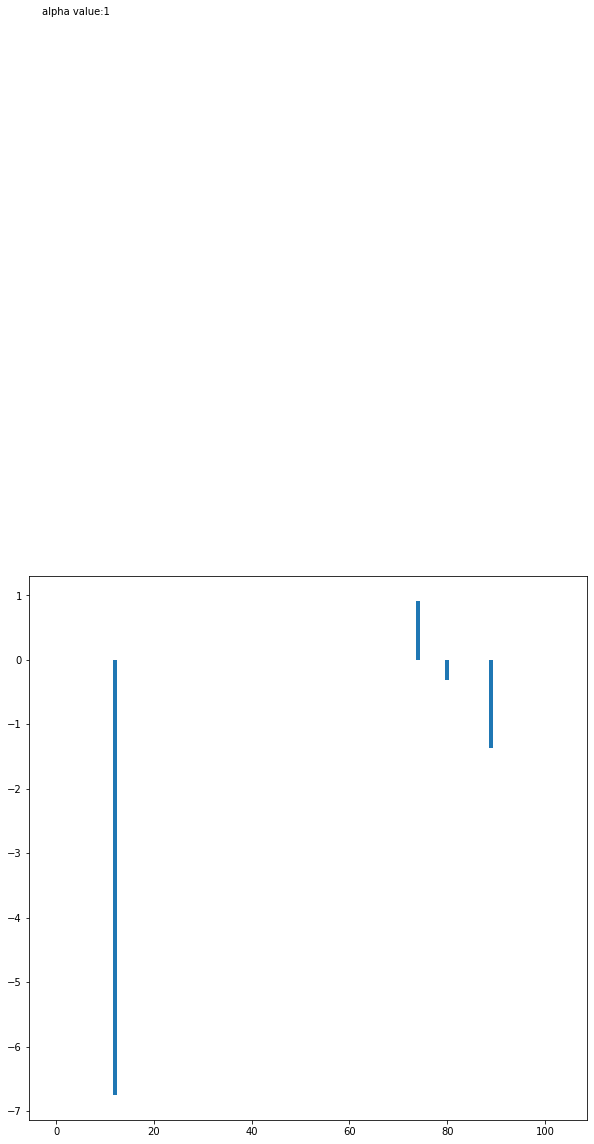

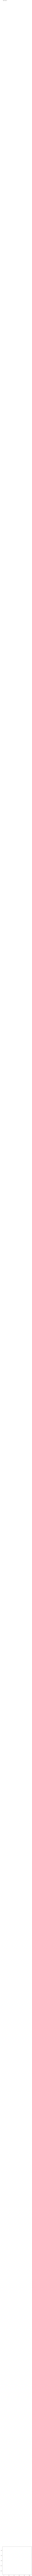

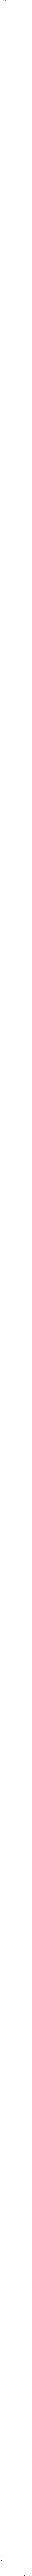

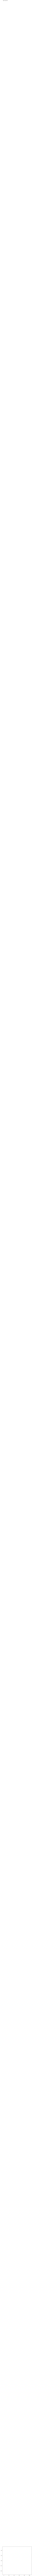

In [108]:
# 알파값 [0.01, 0.1, 1, 10, 100]
# H(x) = W(n) * x(n) + W(n-1) * x(n-1)*... W(0)
# 
alpha_list = [0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    plt.figure(figsize=(10,10))
    plt.bar(range(lasso.coef_.shape[0]), lasso.coef_)
    plt.text(-3, 10,'alpha value:{}'.format(alpha))

In [109]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.338875309416835, tolerance: 3.509685514851485
  positive)


0.8788660960396566

In [110]:
lasso.coef_

array([ -0.        ,   0.        ,  -0.        ,   0.        ,
        -0.        ,   0.        ,  -0.        ,  -8.75946637,
        13.252881  ,   0.        ,  -0.        ,   4.26701683,
        -6.70048233,  -0.        ,  -0.        ,  -0.        ,
         0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -8.09237296,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,   1.81037056,  -0.        ,
         0.        ,  -0.        ,   0.        ,  -0.        ,
         0.        ,  -0.        ,   0.        ,   0.        ,
         0.        ,  -0.        ,   0.        ,   0.        ,
         0.        ,  -0.        ,   0.        ,  -0.23678602,
         0.        ,   7.86575396,  -0.        ,   0.        ,
        -0.        ,   0.        ,  -6.51421743,  -2.23385587,
         0.        ,  -0.        ,   0.        ,   9.68227233,
         0.        ,   2.20294598,  -0.        ,  -2.40133997,
        -3.28354472,  -0.        ,  -0.        ,  -0.  

# Elastic Net
L1 규제 + L2 규제

In [114]:
from sklearn.linear_model import ElasticNet


In [122]:
elastic = ElasticNet(alpha=0.1, l1_ratio=0.3)
elastic.fit(X_train, y_train)
elastic

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.3,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [123]:
elastic.score(X_train, y_train)

0.6831378250567532

In [124]:
elastic.coef_

array([-3.25916231e-01,  2.47484759e-01, -5.68947403e-01,  6.28858024e-01,
       -5.41701468e-01,  3.39487184e+00, -0.00000000e+00, -1.14078772e+00,
        6.82912784e-05, -5.27378686e-01, -1.90451798e+00,  9.49019845e-01,
       -3.36584267e+00, -1.67139190e-01,  0.00000000e+00, -6.11534901e-02,
        0.00000000e+00, -1.04729124e-01, -2.49764254e-02, -2.67559250e-01,
       -0.00000000e+00, -3.18858732e-01, -2.58726257e-01, -1.89778706e-01,
       -8.01924781e-02, -5.04774372e-02,  1.83696273e-01, -0.00000000e+00,
        3.34562391e-02,  0.00000000e+00,  6.89706505e-01,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        2.60740456e-01, -0.00000000e+00, -0.00000000e+00,  1.08406362e-01,
       -5.86990069e-01,  0.00000000e+00, -1.71900567e-01, -1.75298338e-01,
        0.00000000e+00, -0.00000000e+00, -5.03720494e-01, -0.00000000e+00,
       -1.30824259e+00,  6.28905035e-01, -0.00000000e+00,  6.63576003e-01,
        3.35386222e-01,  

지금까지 우리는 하나의 파이프라인을 만들었어요.
- 시애틀 데이터에 파이프라인(전처리까지) 완료하고
- Linear모델들을 적용하고 평가하고 분석해보세요.
- 그리고 각 모델들을 평가해 보세요.  
==> 여기까지가 하나의 프로젝트입니다.